<a href="https://colab.research.google.com/github/shivaprajapati34390-netizen/ML-project/blob/main/stress_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
data=pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/stress.csv")
print(data.head())

          subreddit post_id sentence_range  \
0              ptsd  8601tu       (15, 20)   
1        assistance  8lbrx9         (0, 5)   
2              ptsd  9ch1zh       (15, 20)   
3     relationships  7rorpp        [5, 10]   
4  survivorsofabuse  9p2gbc         [0, 5]   

                                                text     id  label  \
0  He said he had not felt that way before, sugge...  33181      1   
1  Hey there r/assistance, Not sure if this is th...   2606      0   
2  My mom then hit me with the newspaper and it s...  38816      1   
3  until i met my new boyfriend, he is amazing, h...    239      1   
4  October is Domestic Violence Awareness Month a...   1421      1   

   confidence  social_timestamp  social_karma  syntax_ari  ...  \
0         0.8        1521614353             5    1.806818  ...   
1         1.0        1527009817             4    9.429737  ...   
2         0.8        1535935605             2    7.769821  ...   
3         0.6        1516429555       

In [2]:
print(data.isnull().sum())

subreddit                   0
post_id                     0
sentence_range              0
text                        0
id                          0
                           ..
lex_dal_avg_pleasantness    0
social_upvote_ratio         0
social_num_comments         0
syntax_fk_grade             0
sentiment                   0
Length: 116, dtype: int64


In [3]:
import nltk
import re
nltk.download('stopwords')
stemmer=nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [4]:
def clean(text):
  text=str(text).lower()
  text=re.sub('\[.*?\]', '', text)
  text=re.sub('https?://\S+|www\.\S+', '', text)
  text=re.sub('<.*?>+', '', text)
  text=re.sub('[%s]' % re.escape(string.punctuation), '', text)
  text=re.sub('\n', '', text)
  text=re.sub('\w*\d\w*', '', text)
  text=[word for word in text.split(' ') if word not in stopword]
  text=" ".join(text)
  text=[stemmer.stem(word) for word in text.split(' ')]
  text=" ".join(text)
  return text
data["text"] =data["text"].apply(clean)


<>:3: SyntaxWarning: invalid escape sequence '\['
<>:4: SyntaxWarning: invalid escape sequence '\S'
<>:8: SyntaxWarning: invalid escape sequence '\w'
<>:3: SyntaxWarning: invalid escape sequence '\['
<>:4: SyntaxWarning: invalid escape sequence '\S'
<>:8: SyntaxWarning: invalid escape sequence '\w'
/tmp/ipython-input-975/3334424939.py:3: SyntaxWarning: invalid escape sequence '\['
  text=re.sub('\[.*?\]', '', text)
/tmp/ipython-input-975/3334424939.py:4: SyntaxWarning: invalid escape sequence '\S'
  text=re.sub('https?://\S+|www\.\S+', '', text)
/tmp/ipython-input-975/3334424939.py:8: SyntaxWarning: invalid escape sequence '\w'
  text=re.sub('\w*\d\w*', '', text)


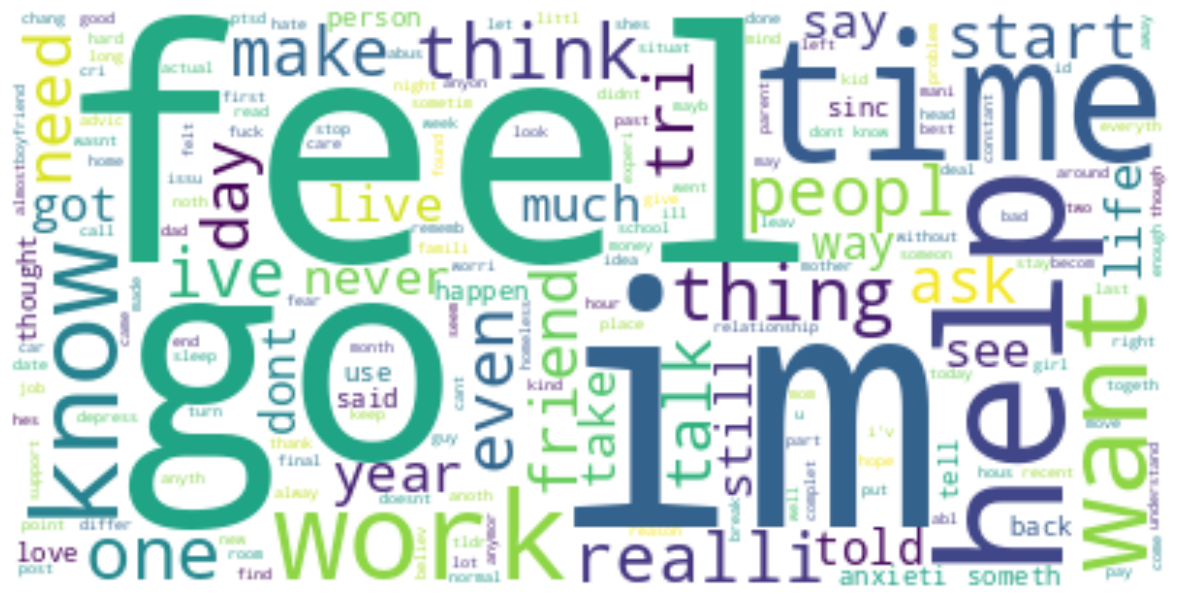

In [6]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS,ImageColorGenerator
text=" ".join(i for i in data.text)
stopwords=set(STOPWORDS)
wordcloud=WordCloud(stopwords=stopwords,
                    background_color="white"
                    ).generate(text)
plt.figure(figsize=(15,20))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

In [7]:
data["label"]=data["label"].map( { 0:"No stress" ,1: "stress"})
data=data[["text","label"]]
print(data.head())

                                                text      label
0  said felt way sugget go rest trigger ahead you...     stress
1  hey rassist sure right place post goe  im curr...  No stress
2  mom hit newspap shock would know dont like pla...     stress
3  met new boyfriend amaz kind sweet good student...     stress
4  octob domest violenc awar month domest violenc...     stress



now split this data sets into training sets or test set


In [9]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [10]:
X = data['text']
y = data['label']

cv = CountVectorizer()
X = cv.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (1986, 7842)
Shape of X_test: (852, 7842)
Shape of y_train: (1986,)
Shape of y_test: (852,)


In [11]:
from sklearn.naive_bayes import  BernoulliNB
model=BernoulliNB()
model.fit(X_train,y_train)

BernoulliNB()

now lets take the performance of our model some given random sentecne

In [14]:
uers=input("enter text")
data=cv.transform([uers]).toarray()
output=model.predict(data)
print(output)

enter texti am exhusted
['No stress']
